In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import collections
from collections import Counter
import os
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import feature_extraction
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.externals import joblib
from sklearn import metrics
from scipy.spatial.distance import cdist,pdist
from sklearn import datasets
from sklearn.decomposition import PCA
from matplotlib import cm
from scipy.cluster.vq import kmeans,vq
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import json

In [5]:
file1 = pd.read_csv("try/results/model1_cbow.vec", sep=' ',header=None) #15231 100
file1.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,patient,0.43570,0.20736,0.45032,1.24240,0.19513,0.56447,0.57755,0.35198,-0.189840,...,0.624460,-1.63450,0.71060,0.51535,-0.394380,-0.628210,-0.13382,0.05882,-0.034029,NaN
1,imag,0.11666,-1.01540,-1.01790,0.69839,-0.41292,-0.52940,0.59213,0.37716,0.555560,...,-2.174200,1.03470,1.87340,0.54609,0.646560,-0.058541,-3.06260,0.91720,-1.500000,NaN
2,</s>,-15.43700,7.18080,-2.77360,-0.77301,12.03200,-8.31270,0.92791,2.55410,2.535600,...,-2.696100,0.64602,-3.56980,0.51294,-0.061209,7.782200,9.91660,9.59500,10.772000,NaN
3,studi,0.35670,0.48308,1.17440,2.19160,0.12358,-1.00390,0.51162,0.33037,0.031143,...,0.040185,-0.96772,1.14840,0.35756,-0.387690,-2.381500,-0.88425,1.54140,0.484720,NaN
4,use,-0.62246,-1.63890,0.88831,-0.72219,-0.99693,-0.37896,-0.21474,0.62754,-0.915130,...,-1.449900,2.65420,0.85295,1.35150,1.486900,0.000328,-0.43303,0.54340,-1.251400,NaN


In [6]:
X=file1.loc[:,1:100].values
type(X)

numpy.ndarray

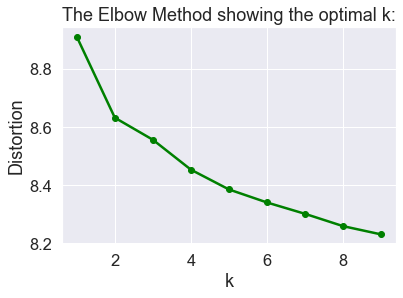

In [26]:
 # k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# plot the elbow
plt.plot(K, distortions, 'go-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k:')
plt.show()

In [24]:
from sklearn.metrics import silhouette_score
sil = []
k= 10
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))


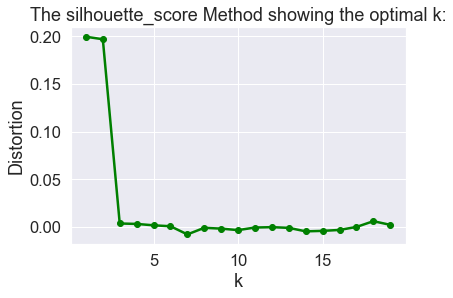

In [25]:
# plot the elbow
plt.plot(K, sil, 'go-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The silhouette_score Method showing the optimal k:')
plt.show()

In [30]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
Kmean.labels_


array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

# tsne

In [32]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# Importing sklearn and TSNE.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
#from sklearn.utils.extmath import _ravel
# Random state we define this random state to use this value in TSNE which is a randmized algo.
RS = 25111993

# Importing matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# Importing seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [33]:
# Loading the vector
# Here we are importing KMeans for clustering Product Vectors
from sklearn.cluster import KMeans
j=3
kmeans = KMeans(n_clusters=j, random_state=0).fit(file1.loc[:,1:100])
# We can extract labels from k-cluster solution and store is to a list or a vector as per our requirement
Y=kmeans.labels_ # a vector
z = pd.DataFrame(Y.tolist()) # a list
# Fit the model using t-SNE randomized algorithm
digits_proj = TSNE(random_state=RS).fit_transform(file1.loc[:,1:100])

In [34]:
# An user defined function to create scatter plot of vectors
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", j))

    # We create a scatter plot.
    f = plt.figure(figsize=(25, 25))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=120,
                    c=palette[colors.astype(np.int)])
    #plt.xlim(-25, 25)
    #plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each cluster.
    txts = []
    for i in range(j):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=50)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

[0, 1, 2]


(<Figure size 1800x1800 with 1 Axes>,
 [Text(28.402292, -38.337353, '0'),
  Text(-7.850015, 13.119243, '1'),
  Text(13.8218155, -72.53835, '2')])

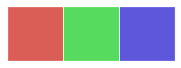

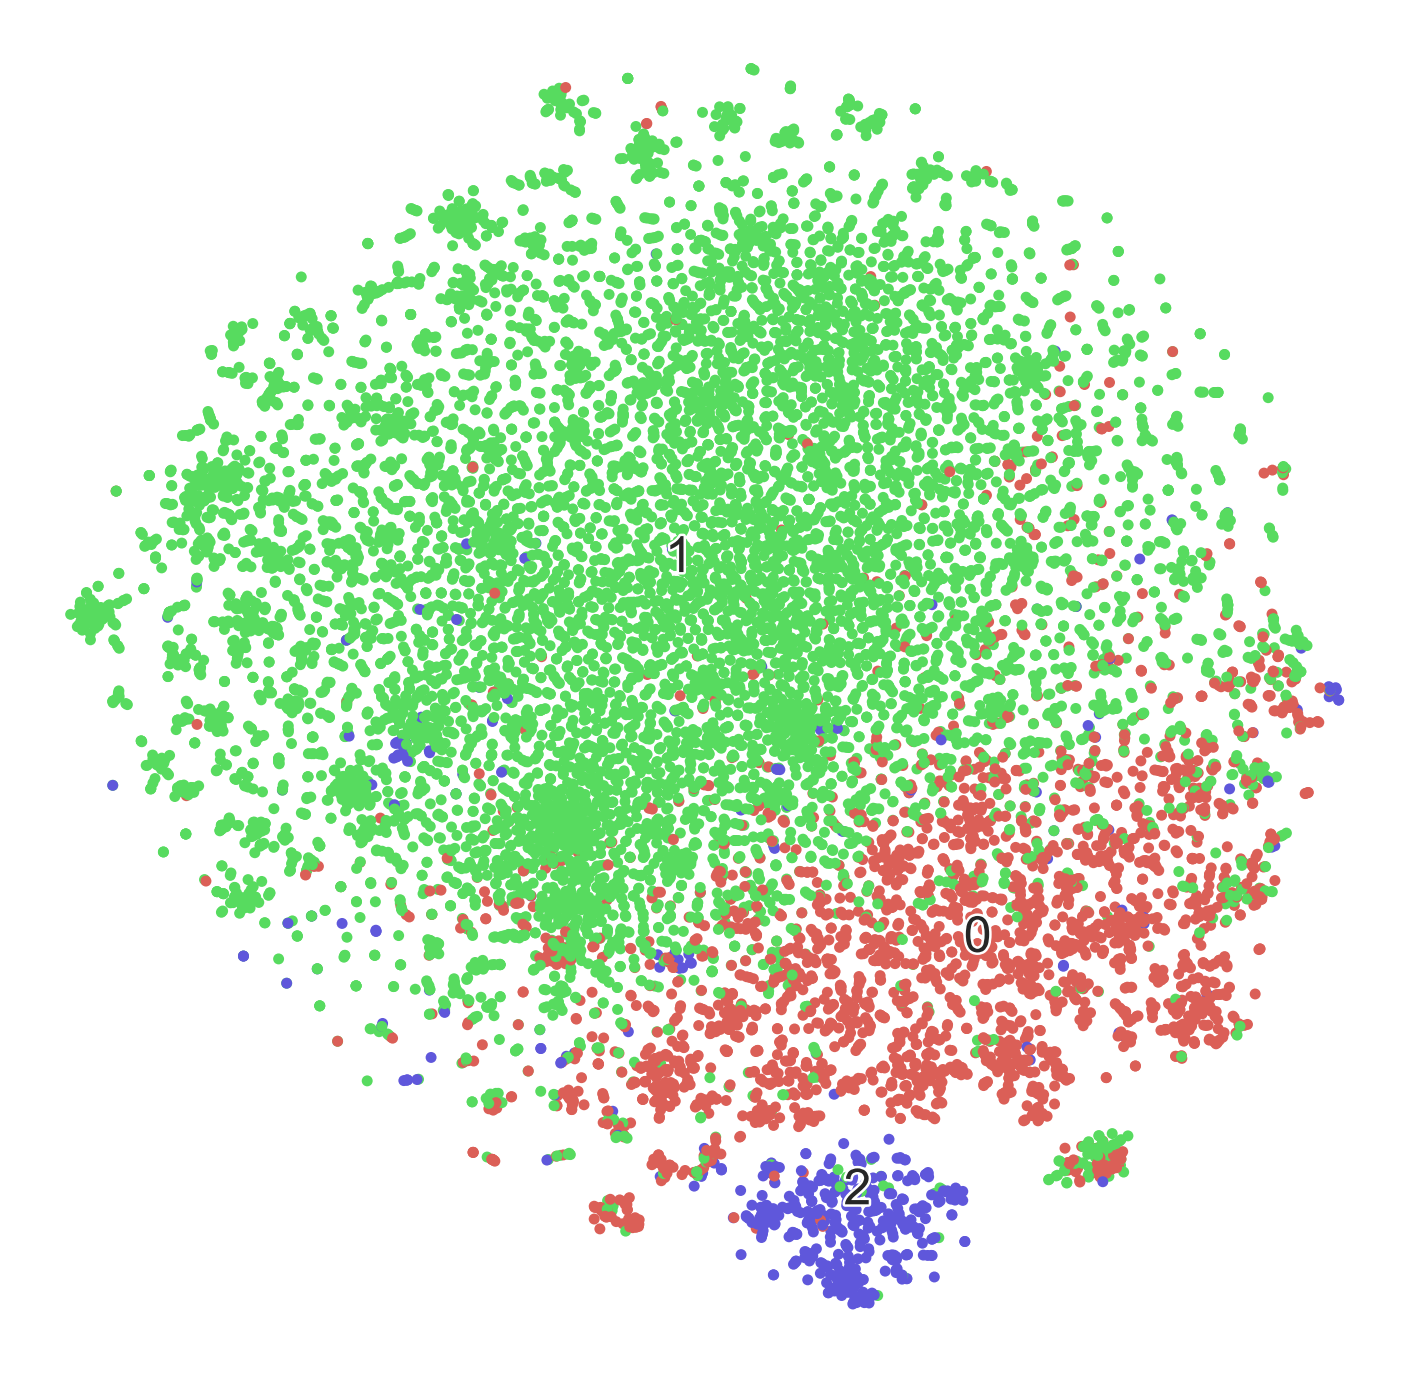

In [35]:
print(list(range(0,j)))
sns.palplot(np.array(sns.color_palette("hls", j)))
scatter(digits_proj, Y)
#plt.savefig('digits_tsne-generated_18_cluster.png', dpi=120)